# 3.Training a Neural Network Model

## 3.1. Loss Graph

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


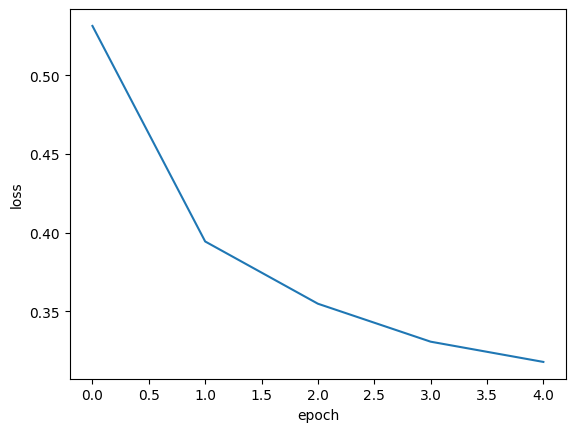

In [ ]:
# Loss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

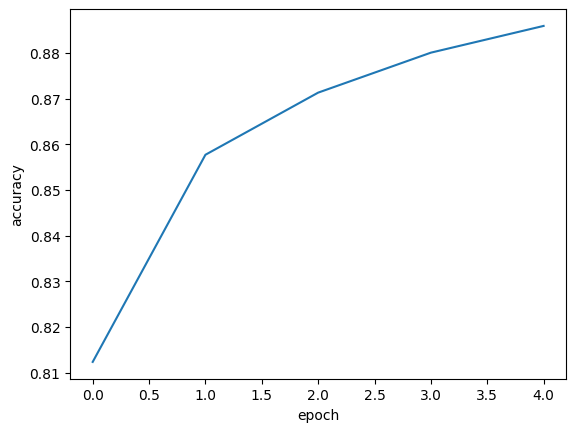

In [ ]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

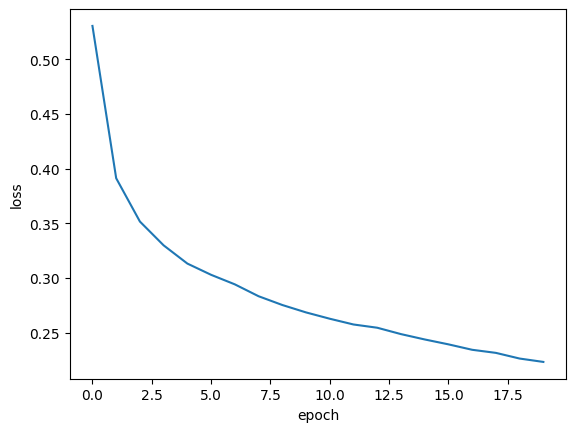

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 3.2. Validation Loss

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


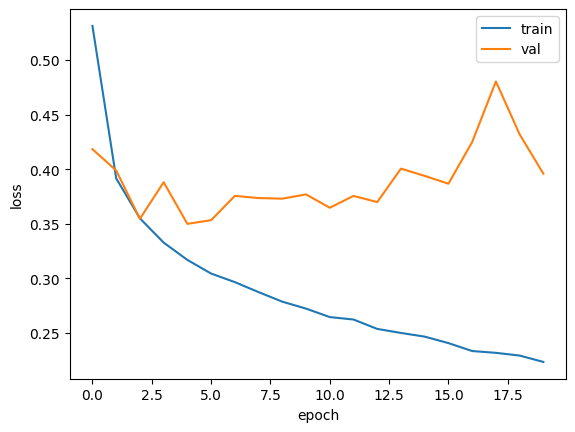

In [ ]:
# Training loss + Validation loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Adam optimizer
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

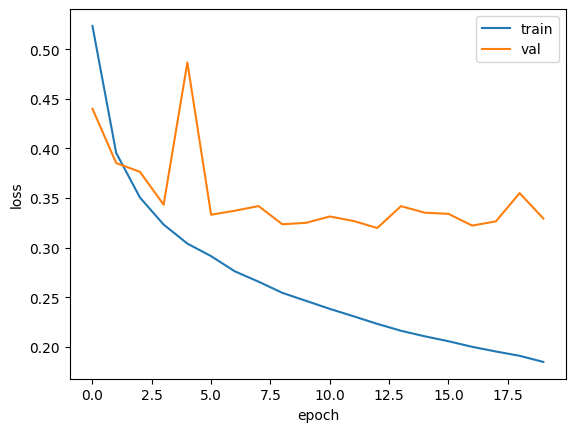

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 3.3. Dropout

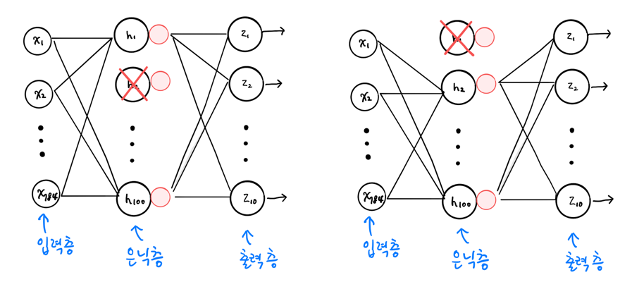

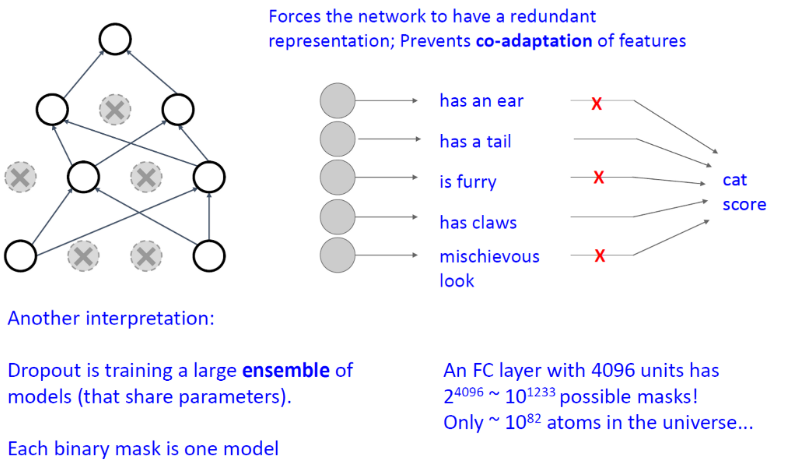

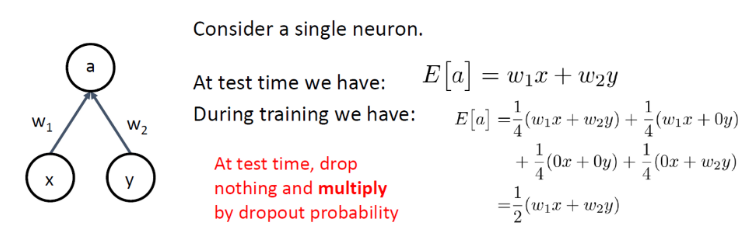

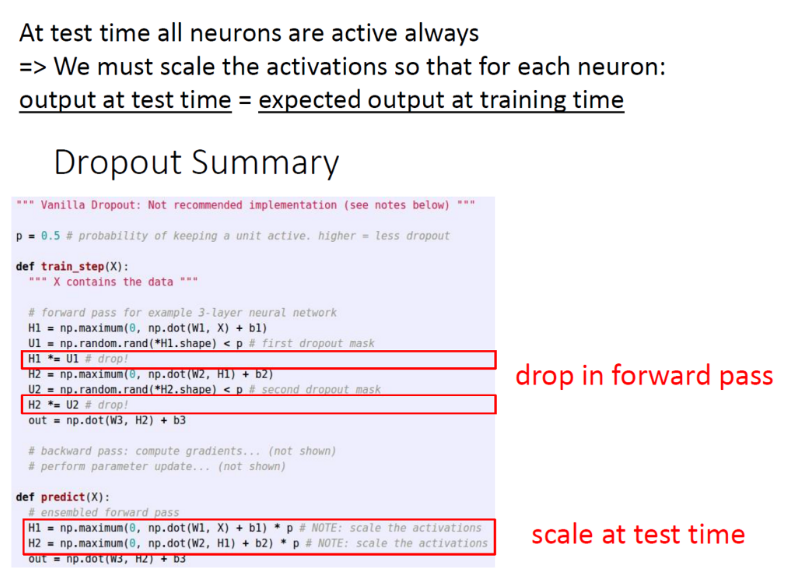

vgg나 alexnet 같은 예전 아키텍쳐를 쓸 때 dropout을 고려해보자

dropout → training 과정에서 “randomness”를 추가해서 훈련을 방해함!

drop out도 일종의 앙상블이라고 해석할 수 있음 

(일정 비율의 hidden unit 을 랜덤하게 생략하는 것이 

일종의 노이즈를 주입하는 것이라고 해석 )

fc가 클때 씀 (다만 요즘 잘 안씀)

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

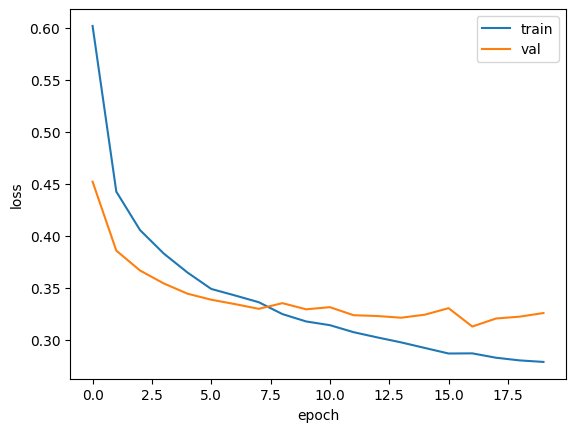

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#Pytorch

Computational Graph : 계산 과정을 그래프로 표현한 것
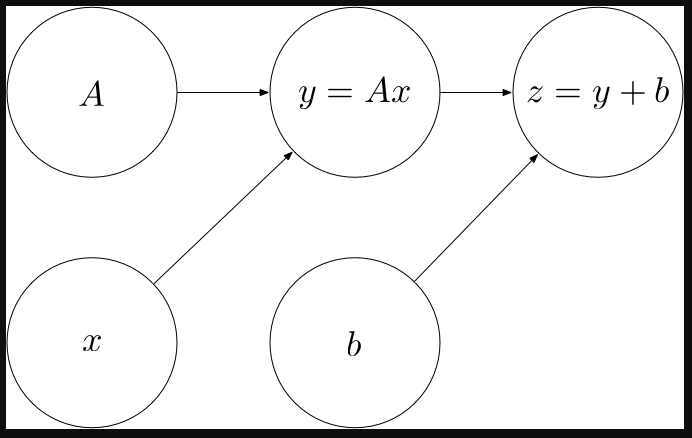


### TensorFlow -> 그래프를 먼저 정의한 후에 실행 시점에서 데이터를 feed시키는 "Define and Run" 방식
\\

### Pytorch -> 실행을 하면서 그래프를 생성하는 "Define by Run" 방식 (Dynamic Computational Graph)
중간중간 값을 확인할 수 있어서 디버그할 때 유리

Numpy구조를 가지는 Tensor라는 객체로 배열을 표현함

Autograd를 지원하며 그 이외에도 딥러닝에 필요한 다양한 함수, 모델을 지원함

\\


In [ ]:
import torch

In [ ]:
x = torch.tensor([[1,2,3], [4,5,6]])
print(x, x.shape, x.dtype)
# 넘파이 사용법과 거의 비슷함 (연산, 슬라이싱, 등등은 생략)

tensor([[1, 2, 3],
        [4, 5, 6]]) torch.Size([2, 3]) torch.int64


In [ ]:
# GPU 사용 가능한지 알아보기
torch.cuda.is_available()
 

True

In [ ]:
# pytorch의 tensor는 GPU에 올려서 사용하는 것이 가능하다!
if torch.cuda.is_available():
  x_gpu = x.to("cuda")

In [ ]:
print(x_gpu)

tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')


# MLP 네트워크는 Input, hidden, output으로 구성됨

input layer에 학습데이터가 들어가고 

hidden layer에서 이전 layer의 모든 출력값과 이번 layer에서 만들어 낼 모든 출력값을 연결하는 Fully connected 연산 수행

output layer에서 최종 output이 완성되고 이를 이용해 error 계산


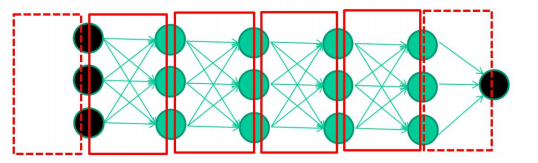

# Network Architecture 구성요소

**nn.Module** 클래스에 필요한 변수/메서드들이 대부분 구현되어있음 (딥러닝을 구성하는 layer의 가장 기본이 되는 클래스 )

nn.Module 클래스를 상속받아 내 네트워크를 하위 클래스로 구현함

 .
 
## 필요한 기능
layer 준비 : 네트워크에 필요한 레이어의 세부조건들을 설정함 (생성자 \__init__에 구현)

forward 함수 : input data가 들어오면 레이어를 따라 연산하여 최종 output을 구할 수 있도록 계산하는 함수 (메서드로 구현)

error 계산 : 위에서 구한 output을 이용하여 target과 비교하여 error 계산 (학습함수에서 따로 진행)

backward함수 (backpropagation)  : 계산된 error값들을 앞쪽 레이어들에 전파할 수 있도록 하여 weight를 업데이트시킴 (학습함수에서 따로 진행)


###AutoGrad

- PyTorch -> backward함수를 통해 자동미분 지원
    - 보통 미분의 대상이 되는 애들은 requires_grad=True로 설정해줌
    - 하지만 우리가 직접 설정할 일은 거의 없음 

      (실제로 모델을 만들다 보면 nn.linear같은것을 사용하는데
      거기에 이미 다 설정이 되어있음)

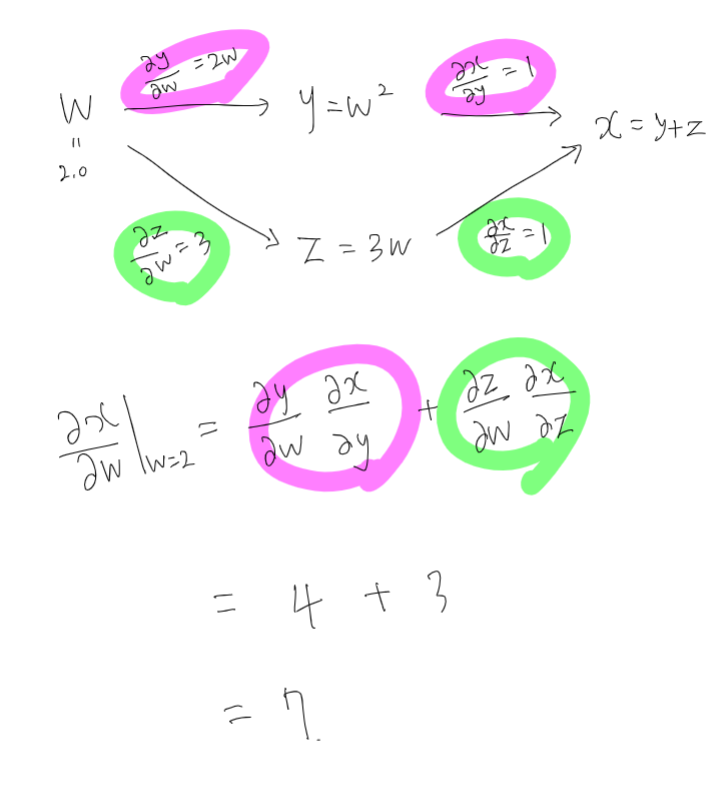

In [ ]:
w = torch.tensor(2.0, requires_grad = True)
y = w**2
z = 3*w
x = y + z
x.backward()   # x가 스칼라이어야 backward 가능
w.grad


tensor(7.)

### Backward

- Layer에 있는 Parameter들의 미분을 수행
- Forward의 결과값 (model의 output=예측치)과 실제값 간의 차이(loss)에 대해 미분을 수행하여 gradient 구함

위에서 구한 gradient를 이용하여 optimizer를 통해 Parameter 업데이트

# 1. 학습에 사용할 네트워크 class 정의

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
nn.Linear(2,3)(torch.tensor([1.,2.]))     #linear = fully connected layer, (input, output)
nn.Linear(2,3).bias

Parameter containing:
tensor([-0.4746,  0.0876, -0.3935], requires_grad=True)

In [ ]:
class Net(nn.Module):     # nn.Module에서 상속받음
  def __init__(self):
    super(Net, self).__init__()     # 생성자에 상위 클래스 생성자 우선 실행
    
    # 사용할 레이어들의 뼈대를 구성해줌
    # 28*28 이미지를 크기784 벡터로 -> 최종 10개 분류
    #그레이 이미지 : n*1*w*h   (n은 batch size)
    # 컬러이미지 : n*3*w*h
    
    self.l1 = nn.Linear(784, 520)
    self.l2 = nn.Linear(520, 320)
    self.l3 = nn.Linear(320, 240)
    self.l4 = nn.Linear(240, 120)
    self.l5 = nn.Linear(120, 10)
    
  def forward(self, x):     # forward 메서드 (꼭 "forward"라는 이름으로 해야함)
    
    # 준비된 layer들을 통과시켜서 output 생성
    # actvation 함수들도 적용

    x = x.view(-1, 784)     # input (n, 1, 28, 28) -> (n, 784)  flatten 시킴
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = F.relu(self.l3(x))
    x = F.relu(self.l4(x))
    return self.l5(x)

In [ ]:
testmodel = Net()

In [ ]:
testmodel

Net(
  (l1): Linear(in_features=784, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=320, bias=True)
  (l3): Linear(in_features=320, out_features=240, bias=True)
  (l4): Linear(in_features=240, out_features=120, bias=True)
  (l5): Linear(in_features=120, out_features=10, bias=True)
)

In [ ]:
testmodel(torch.rand(8,1,28,28)).shape

torch.Size([8, 10])

#2. Data 불러오기

In [ ]:
# 만약 gpu쓰고 싶다면?
# 헉

In [ ]:
from google.colab import drive
drive.mount('/content/mai_drive')    # 구글드라이브 마운트

Drive already mounted at /content/mai_drive; to attempt to forcibly remount, call drive.mount("/content/mai_drive", force_remount=True).


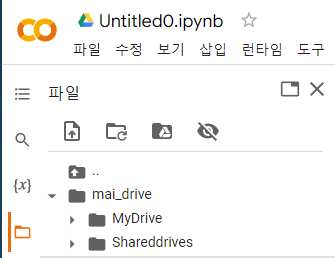

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'     # nvidia gpu / 아니면 cpu
print(f'Training MNIST Model on {device}\n{"="*44}')

Training MNIST Model on cuda


In [ ]:
from torchvision import datasets, transforms

#MNIST dataset
train_dataset = datasets.MNIST(root='/content/mai_drive/My Drive/mai1/mnist_data/', 
                              train=True, 
                              transform=transforms.ToTensor(),
                              download=True)
test_dataset = datasets.MNIST(root='/content/mai_drive/My Drive/mai1/mnist_data/',
                             train=False,
                             transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 95387983.83it/s]


Extracting /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32828101.31it/s]


Extracting /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26340633.60it/s]


Extracting /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7464940.74it/s]


Extracting /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mai_drive/My Drive/mai1/mnist_data/MNIST/raw



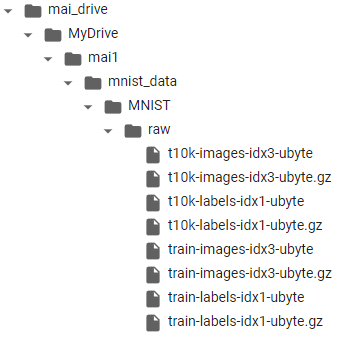

## DataLoader 클래스

- Data의 Batch를 생성
- training 전에 데이터를 변환시킴
- Tensor로 변환 + Batch 처리가 메인 업무
- DataLoader는 iterable한 객체기 때문에 iter 명령어를 사용한 후 그 다음 next를 사용해서 다음 데이터를 추출할 수 있다

In [ ]:
batch_size = 64   # training image batch로 64개씩 묶어서 


In [ ]:
from torch.utils import data


# Data loader
train_loader = data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset,
                              batch_size=batch_size,
                              shuffle=False)


In [ ]:
asdf = iter(train_loader)

In [ ]:
next(asdf) # next를 사용할 때 마다 다음 값이 출력됨 ㄷㄷ

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

tensor(8)


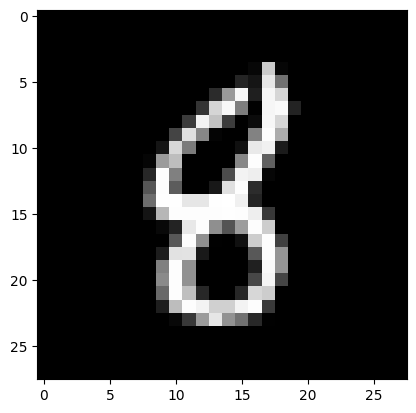

In [ ]:
import matplotlib.pyplot as plt

for i, (data, target) in enumerate(train_loader):
  if i == 1:
    break
  plt.imshow(data[1].permute(1,2,0), cmap='gray')
  print(target[1])


#3. Training

1) 방금 정의한 내 네트워크 class를 instance로 생성

2) (optional) 적절한 device에 맞춰 할당

3) 사용할 loss function 선언

4) 사용할 optimization 방법 선언

5) 각 epoch에 대해 학습 진행

In [ ]:
# 모델 생성
model = Net()
model.to(device)

from torch import optim

# 손실함수, optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
for i in model.parameters():
  print(i)

Parameter containing:
tensor([[-0.0021,  0.0265,  0.0217,  ...,  0.0183,  0.0110, -0.0315],
        [-0.0248,  0.0319,  0.0326,  ..., -0.0135,  0.0020, -0.0250],
        [ 0.0284, -0.0342,  0.0076,  ...,  0.0352, -0.0352,  0.0100],
        ...,
        [-0.0236, -0.0208, -0.0006,  ...,  0.0326,  0.0049, -0.0031],
        [-0.0114,  0.0179, -0.0280,  ..., -0.0049,  0.0153, -0.0206],
        [ 0.0131, -0.0244,  0.0243,  ...,  0.0115, -0.0137,  0.0060]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 5.5414e-03, -4.6004e-03, -2.6382e-02, -3.4563e-02, -3.0856e-02,
        -2.8303e-03,  8.0313e-03, -5.7360e-03, -1.0992e-02, -1.6274e-02,
        -2.8993e-02,  2.4596e-02, -3.4634e-02,  8.8716e-03, -1.4904e-02,
         3.5478e-02, -3.5574e-03,  1.8838e-02, -2.0451e-02, -3.5057e-02,
        -2.8730e-02,  1.7038e-02,  3.3949e-02,  4.1921e-03, -4.4587e-04,
         7.5067e-03,  3.2441e-02,  2.7387e-02,  1.3894e-03, -6.1800e-03,
         1.7393e-02, -1.2612e-03, -3.074

In [ ]:
def count_param1(model):
  cnt = 0
  for p in list(model.parameters()):    # p.size() <- torch.size([128,3,3,3]) 이런 꼴이니까 전부 다 곱하면 parameter 숫자 나옴
    cnt += torch.prod(torch.tensor(p.size()))  
  return cnt

In [ ]:
count_param1(model)

In [ ]:
def count_param2(model):
  # count trainable model parameters
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
count_param2(model)

In [ ]:
# 학습 함수 정의

def train(epoch):
  model.train()     # 모델을 training 모드로 
  for batch_idx, (data,target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()     # gradient 초기화 안 하면 계속 누적됨
    output = model(data)

    loss = criterion(output, target)
    loss.backward()   # output인 loss가 스칼라일때 backward가 가능하다.

    optimizer.step()      # backward() 연산을 한 뒤에 optimizer.step() 을 통해 weight를 업데이트 

    if batch_idx %100 == 0:
      print(f'train epoch {epoch} | loss {loss.item()} | batch status {batch_idx}/{len(train_loader)}')

#4.Test

test는 trainin과 달리 forward만 진행

단, 이 경우는 각 class에 대한 확률값을 구하는 것에서 멈추지 않고

가장 높은 확률의 class를 정답으로 선언해야 함

그 후 이 정답과 target값을 비교하여 성능을 평가함

In [ ]:
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)      # (n, 10) 크기

    # loss 계산
    test_loss += criterion(output, target).item()   # .item() :  텐서에서 값만 가져옴

    # n개의 이미지들에 대해 각가 10개 클래스에 대한 확률값들이 존재
    # 그 확률값 중 가장 큰 값의 위치를 구한 후 그것을 target과 비교

    idx = output.argmax(1, keepdim=True)      # (n,1) 크기  <- target텐서의 크기 (n)과 다르다다
    idx = idx.squeeze()     # 1인 차원 제거 -> (n) 크기 

    correct += (target == idx).sum()

  test_loss /= len(test_loader.dataset)

  print(f'Average loss = {test_loss},   Accuracy = {correct}/{len(test_loader.dataset)}')

    



In [ ]:
import time

In [ ]:
if __name__ == '__main__':
 
  since = time.time()
  for epoch in range(1, 2):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training time: {m:.0f}m {s:.0f}s')
    
    test()
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Tesing time: {m:.0f}m {s:.0f}s')

  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')

train epoch 1 | loss 2.304637908935547 | batch status 0/938
train epoch 1 | loss 2.297091484069824 | batch status 100/938
train epoch 1 | loss 2.297016143798828 | batch status 200/938
train epoch 1 | loss 2.297445297241211 | batch status 300/938
train epoch 1 | loss 2.2924532890319824 | batch status 400/938
train epoch 1 | loss 2.270965814590454 | batch status 500/938
train epoch 1 | loss 2.223024845123291 | batch status 600/938
train epoch 1 | loss 2.1821916103363037 | batch status 700/938
train epoch 1 | loss 1.9635717868804932 | batch status 800/938
train epoch 1 | loss 1.7451804876327515 | batch status 900/938
Training time: 0m 10s
Average loss = 0.022775607120990752,   Accuracy = 5946/10000
Tesing time: 0m 12s
Total time : 0m  12s 
Model was trained on cuda!


In [ ]:
from torchsummary import summary
summary(model, (1, 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 520]         408,200
            Linear-2                  [-1, 320]         166,720
            Linear-3                  [-1, 240]          77,040
            Linear-4                  [-1, 120]          28,920
            Linear-5                   [-1, 10]           1,210
Total params: 682,090
Trainable params: 682,090
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.60
Estimated Total Size (MB): 2.61
----------------------------------------------------------------


In [ ]:
summary(model, (100000, 1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 520]         408,200
            Linear-2                  [-1, 320]         166,720
            Linear-3                  [-1, 240]          77,040
            Linear-4                  [-1, 120]          28,920
            Linear-5                   [-1, 10]           1,210
Total params: 682,090
Trainable params: 682,090
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 299.07
Forward/backward pass size (MB): 0.01
Params size (MB): 2.60
Estimated Total Size (MB): 301.68
----------------------------------------------------------------


# 모델 저장, 불러오기

In [ ]:
model.state_dict() # 모델의 파라미터 표시

OrderedDict([('l1.weight',
              tensor([[-0.0021,  0.0265,  0.0217,  ...,  0.0183,  0.0110, -0.0315],
                      [-0.0248,  0.0319,  0.0326,  ..., -0.0135,  0.0020, -0.0250],
                      [ 0.0284, -0.0342,  0.0076,  ...,  0.0352, -0.0352,  0.0100],
                      ...,
                      [-0.0236, -0.0208, -0.0006,  ...,  0.0326,  0.0049, -0.0031],
                      [-0.0114,  0.0179, -0.0280,  ..., -0.0049,  0.0153, -0.0206],
                      [ 0.0131, -0.0244,  0.0243,  ...,  0.0115, -0.0137,  0.0060]],
                     device='cuda:0')),
             ('l1.bias',
              tensor([ 2.7023e-02,  4.7806e-03, -2.5136e-02, -2.4645e-02, -3.0797e-02,
                       1.3176e-02,  9.2278e-03, -7.4171e-03, -3.1382e-03, -1.4571e-02,
                      -2.8390e-02,  4.1563e-02, -2.9994e-02,  4.2923e-03, -3.8996e-03,
                       4.5683e-02, -5.3397e-03,  2.0061e-02, -2.0534e-02, -3.5260e-02,
                      -2.201

In [ ]:
import os

In [ ]:
# 모델의 parameter만 저장
torch.save(model.state_dict(), os.path.join("/content/mai_drive/My Drive/mai1", "model.pt")) 

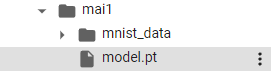

In [ ]:
model2 = Net()

In [ ]:
param_load = torch.load(os.path.join("/content/mai_drive/My Drive/mai1", "model.pt"))

In [ ]:
param_load

In [ ]:
model2.load_state_dict(param_load)

<All keys matched successfully>

In [ ]:
# 모델과 모델의 parameter를 전부 저장하는 것도 가능
torch.save(model, os.path.join("/content/mai_drive/My Drive/mai1", "model.pt"))

In [ ]:
model3 = torch.load(os.path.join("/content/mai_drive/My Drive/mai1", "model.pt")) # 모델도 한 번에 불러온다!

In [ ]:
torch.load(os.path.join("/content/mai_drive/My Drive/mai1", "model.pt"))

Net(
  (l1): Linear(in_features=784, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=320, bias=True)
  (l3): Linear(in_features=320, out_features=240, bias=True)
  (l4): Linear(in_features=240, out_features=120, bias=True)
  (l5): Linear(in_features=120, out_features=10, bias=True)
)

In [ ]:
model2.load_state_dict(param_load) # model.pt에 parameter만 있는 것이 아니라 모델구조에 대한 정보도 같이 들어가 있기 때문에 맞지 않음